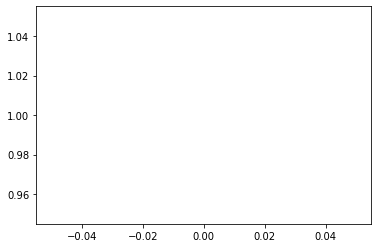

In [3]:

import os
import gc
import time
import torch
import numpy as np
import torch.nn as nn
%matplotlib inline
#%matplotlib notebook

import torch.backends.cudnn as cudnn
import torch.utils.data as data
from torch.optim import lr_scheduler
from torch.utils.data import ConcatDataset
from PIL import Image

from dataset import MyDataset,SynthText, TotalText, Ctw1500Text, Icdar15Text, LsvtTextJson,\
    Mlt2017Text, TD500Text, ArtTextJson, Mlt2019Text, Ctw1500Text_New, TotalText_New, ArtText
from network.loss import TextLoss
from network.textnet import TextNet
from util.augmentation import Augmentation
from cfglib.config import config as cfg, update_config, print_config
from util.misc import AverageMeter
from util.misc import mkdirs, to_device
from cfglib.option import BaseOptions
from util.visualize import visualize_network_output
from torch.utils.tensorboard import SummaryWriter
from util.shedule import FixLR

from train_config_400 import configuration

import matplotlib.pyplot as plt
from demo import visualize_detection
import cv2

#torch.cuda.empty_cache()

plt.plot([1])
plt.show()

Loading from model/MyDataset/TextBPN_resnet50_270.pth
torch.Size([3, 103, 532])
output_dict['fy_preds'].shape=torch.Size([1, 4, 103, 532])
py_pred.shape=torch.Size([32, 30, 2])
py_pred.shape=torch.Size([32, 30, 2])
py_pred.shape=torch.Size([32, 30, 2])
py_pred.shape=torch.Size([32, 30, 2])
ind.shape=torch.Size([32]) ind=tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])
ind.shape=torch.Size([32]) ind=tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])
output_dict['confidences']=[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


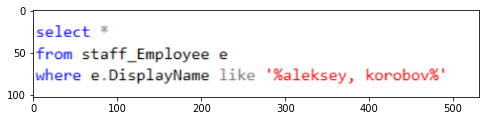

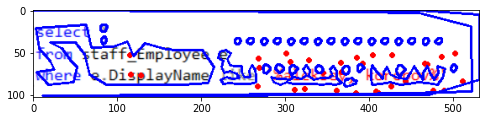

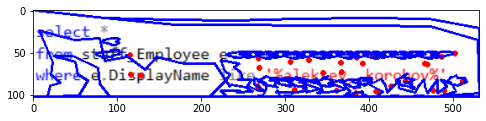

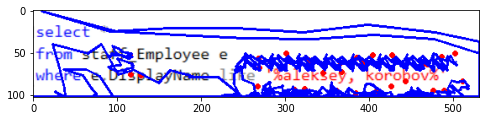

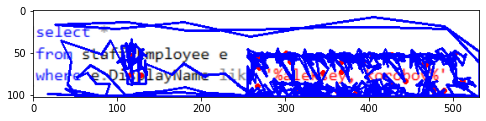

In [11]:
from cfglib.config import config
from util.my_utils import get_center_loss,get_center_counters_fact,get_center_counters_predict

# option = BaseOptions()
# args = option.initialize()
# #update_config(cfg, args)
input_size = 640
means = (0.485, 0.456, 0.406)
stds = (0.229, 0.224, 0.225)
num_workers = 1
device = 'cpu'
net = 'resnet50'
is_training = False
config.device = 'cpu'

model = TextNet(backbone=net, is_training=False)
#model_path = 'model/MLT2019/TextBPN_resnet50_300.pth'
model_path = 'model/MyDataset/TextBPN_resnet50_270.pth'
model.load_model(model_path)
model = model.to(device)
model.eval()
#print(model)
config.device = device

input_dict = {}
img_show = cv2.imread('/home/aleksei/MyProject/netology/dll-19/diplom/MyExample/im_20230302_190911.jpg')
#img_show = cv2.imread('/home/aleksei/MyProject/netology/dll-19/diplom/MyExample/im_20230301_181215.jpg')
img_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
img = img_show.copy()
img = img.transpose(2, 0, 1)
img = torch.from_numpy(img).float()
print(f'{img.shape}')

input_dict['img'] = torch.tensor([np.array(img)])
with torch.no_grad():
    output_dict = model(input_dict)

print(f"{output_dict['fy_preds'].shape=}")
for py_pred in output_dict['py_preds']:
    print(f"{py_pred.shape=}")
for ind in output_dict['inds']:
    print(f"{ind.shape=} {ind=}")
print(f"{output_dict['confidences']=}")
    
    


plt.figure(figsize=(8,8))
im_show0 = img_show.copy()
plt.imshow(im_show0)
plt.show()


centers_pred = get_center_counters_predict(output_dict)

show_boundary, heat_map = visualize_detection(img_show, output_dict, meta=None)
for py in output_dict['py_preds']:
    im_show0 = img_show.copy()
    for cx,cy in centers_pred:
        cx,cy = int(cx.item()),int(cy.item())
        cv2.circle(im_show0, (cx, cy), 2, (255, 0, 00), 2)
    contours = py.data.cpu().numpy()
    cv2.drawContours(im_show0, contours.astype(np.int32), -1, (0, 0, 255), 2)
    plt.figure(figsize=(8,8))
    plt.imshow(im_show0)
    plt.show()
    #break

tensor(0.1667)

In [19]:
for k in output_dict.keys():
    if torch.is_tensor(output_dict[k]):
        print(f'{k=}, {output_dict[k].shape}')
    else:
        if output_dict[k] is None:
            print(f'{k=} None')
        else:
            for item in output_dict[k]:
                if torch.is_tensor(item):
                    print(f'{k=}, {item.shape=}')



k='fy_preds', torch.Size([1, 4, 640, 640])
k='py_preds', item.shape=torch.Size([3, 30, 2])
k='py_preds', item.shape=torch.Size([3, 30, 2])
k='py_preds', item.shape=torch.Size([3, 30, 2])
k='py_preds', item.shape=torch.Size([3, 30, 2])
k='inds', item.shape=torch.Size([3])
k='inds', item.shape=torch.Size([3])
k='confidences' None


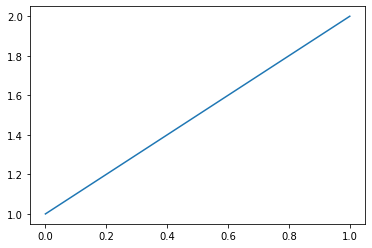

In [1]:
import matplotlib.pyplot as plt
plt.plot([1,2])

Loading from model/MyDataset/TextBPN_resnet50_275.pth
torch.Size([1, 3, 500, 500])
output_dict['fy_preds'].shape=torch.Size([1, 4, 500, 500])
py_pred.shape=torch.Size([381, 30, 2])
py_pred.shape=torch.Size([381, 30, 2])
py_pred.shape=torch.Size([381, 30, 2])
py_pred.shape=torch.Size([381, 30, 2])
ind.shape=torch.Size([381]) ind=tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0

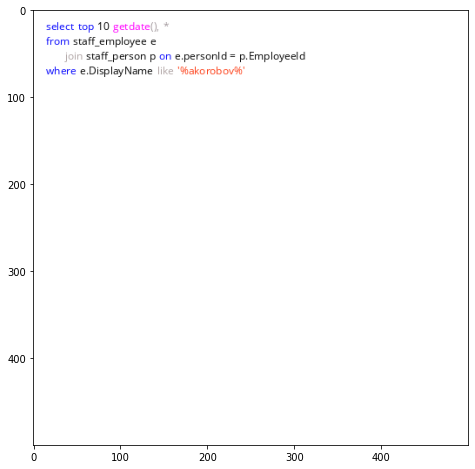

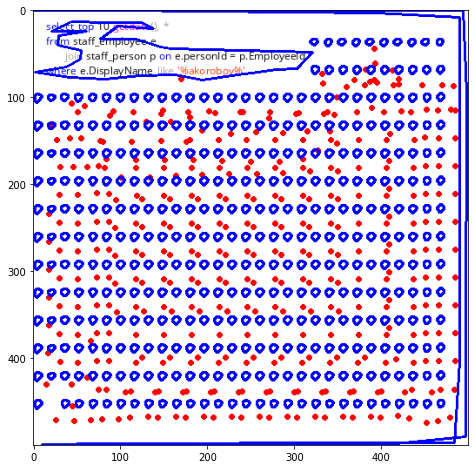

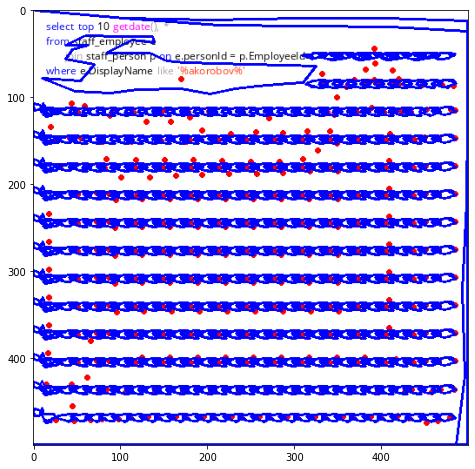

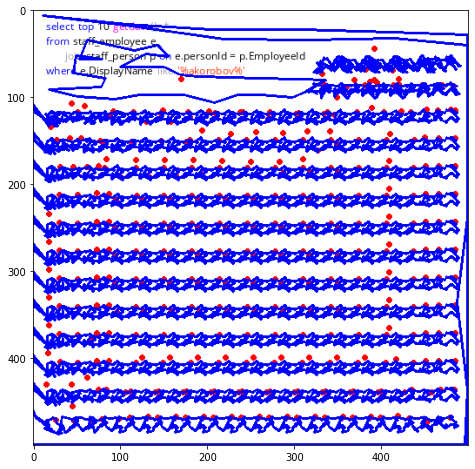

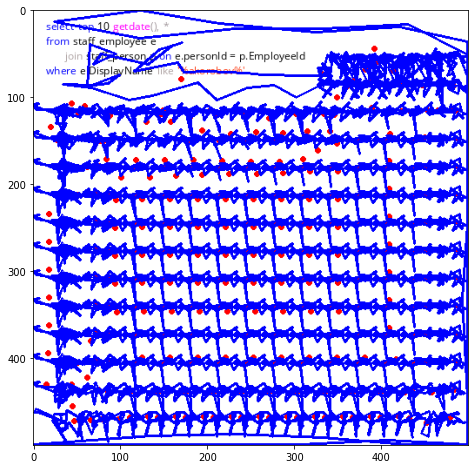

In [15]:
import MyGenerator.ImageGenerator as im
import matplotlib.pyplot as plt
import importlib
import MyGenerator.parse_text as p
import util.my_utils as u
importlib.reload(plt)
importlib.reload(u)
importlib.reload(p)
importlib.reload(im)
from MyGenerator.ImageGenerator import ImageGenerator
import matplotlib.pyplot as plt
from util.my_utils import image_box_show

config = [{
    'fonts':['dataset/MyGenerator/font.ttf','dataset/MyGenerator/XO_Oriel_Bi.ttf','dataset/MyGenerator/consolas/consola.ttf']
    , 'texts':[
f'''<format color=#0505FE>select top</format> 10 <format color=#FF00FF>getdate</format><format color=#A59CA0>(), *</format>
<format color=#0505FE>from</format> staff_employee e
\t<format color=#AFA4A4>join</format> staff_person p <format color=#0505FE>on</format> e.personId = p.EmployeeId
<format color=#0505FE>where</format> e.DisplayName <format color=#AFA4A4>like</format> <format color=#FD3D15>'%akorobov%'</format>
'''
    ]
    , 'text_colors':['#030303']
    , 'size_images':[(500,500)]

    , 'position_texts':[(15,10),(5,50),(5,20),(15,120)]
    , 'font_sizes':[12,15]
    , 'background_colors':['#ffffff']
    , 'use_box':[False]#not word
    , 'box_colors':['#555555']
    , 'use_lines':['0000','0000']
    , 'lines_colors':['#555555']
    , 'box_colors':['#555555']#not word
}]
i = ImageGenerator(config)
img,box,text = i.get_by_index(0)
# #img = image_box_show(img, box, color = (100,100,100))
# plt.figure(figsize=(8,8))
# plt.imshow(img)
# #plt.plot([1])
# plt.show()



from cfglib.config import config
from util.my_utils import get_center_loss,get_center_counters_fact,get_center_counters_predict

# option = BaseOptions()
# args = option.initialize()
# #update_config(cfg, args)
input_size = 640
means = (0.485, 0.456, 0.406)
stds = (0.229, 0.224, 0.225)
num_workers = 1
device = 'cpu'
net = 'resnet50'
is_training = False
config.device = 'cpu'

model = TextNet(backbone=net, is_training=False)
#model_path = 'model/MLT2019/TextBPN_resnet50_300.pth'
model_path = 'model/MyDataset/TextBPN_resnet50_275.pth'
model.load_model(model_path)
model = model.to(device)
model.eval()
#print(model)
config.device = device

input_dict = {}
# img_show = cv2.imread('/home/aleksei/MyProject/netology/dll-19/diplom/MyExample/im_20230302_190911.jpg')
# #img_show = cv2.imread('/home/aleksei/MyProject/netology/dll-19/diplom/MyExample/im_20230301_181215.jpg')
# img_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
img_show = np.asarray(img)
#img = img_show.copy()
#img = img.transpose(2, 0, 1)
#img = torch.from_numpy(img).float()
#print(f'{img.shape}')

input_dict['img'] = torch.tensor([np.array(img)])
input_dict['img'] = input_dict['img'].permute(0, 3, 1, 2)
print(f"{input_dict['img'].shape}")
with torch.no_grad():
    output_dict = model(input_dict)

print(f"{output_dict['fy_preds'].shape=}")
for py_pred in output_dict['py_preds']:
    print(f"{py_pred.shape=}")
for ind in output_dict['inds']:
    print(f"{ind.shape=} {ind=}")
print(f"{output_dict['confidences']=}")
    
    


plt.figure(figsize=(8,8))
im_show0 = img_show.copy()
plt.imshow(im_show0)
plt.show()


centers_pred = get_center_counters_predict(output_dict)

show_boundary, heat_map = visualize_detection(img_show, output_dict, meta=None)
for py in output_dict['py_preds']:
    im_show0 = img_show.copy()
    for cx,cy in centers_pred:
        cx,cy = int(cx.item()),int(cy.item())
        cv2.circle(im_show0, (cx, cy), 2, (255, 0, 00), 2)
    contours = py.data.cpu().numpy()
    cv2.drawContours(im_show0, contours.astype(np.int32), -1, (0, 0, 255), 2)
    plt.figure(figsize=(8,8))
    plt.imshow(im_show0)
    plt.show()
    #break















- log_image_400_Adam_2 - обучение на train_config_400.py тестирование на test_config_400.py изображения размером 400px, обучение длилось 120 эпох\ 
результат на реальной картинке:\
<img src='result_image/Screenshot_20230227_084046_TextBPN_resnet50_115_adam_2_3.png' wigth='300px' />\
результат на тестовой картинке:\
<img src='result_image/Screenshot_20230227_084046_TextBPN_resnet50_120_adam_2_2.png' wigth='500px' />\
<img src='result_image/Screenshot_20230227_084046_TextBPN_resnet50_120_adam_2_3.png' wigth='500px' />

- log_image_400_SGD_2 переключим на SGD, добавим больше картинок, и добавим картинки, только со спец символами, чтобы модель их тоже находила
